In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read the dataset
path = "Downloads//iris.csv"
iris_data = pd.read_csv(path)


In [4]:

#Create a user-defined function to compute pairwise Pearson correlation coefficients.
#The function takes two variables as arguments and returns the correlation coefficient between them. ( 6 points)

def pairwise_Pearson_correlation_coefficients(variable_A : list,variable_B : list) -> float : 
    """
    This function calculates the Pairwise Pearson correlation coefficients for the given two variables.
    param variable_A : List of values 
    param variable_B : List of values
    
    returns : float value which is Pearson correlation coefficients for the two variables.
    """

    #First we will find the covariance between the two variables.
    #Following function finds the covariance between two variables
    def covariance( A, B):
        
        mean_A = np.mean(A)    
        mean_B = np.mean(B)
        

        numerator = sum([(A[i]-mean_A) * (B[i]- mean_B) for i in range(len(A))])
        denomerator = len(A)
    
        cov = numerator/denomerator
        return cov
    
    
    #The standard deviations of the two variables are:-
    std_A = np.std(variable_A)
    std_B = np.std(variable_B)
    
    pcc = covariance(variable_A,variable_B)/(std_A*std_B)
    return pcc



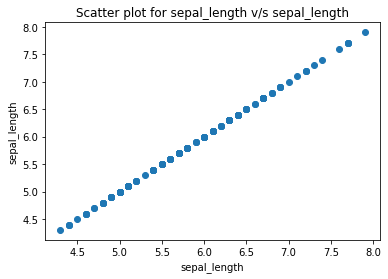

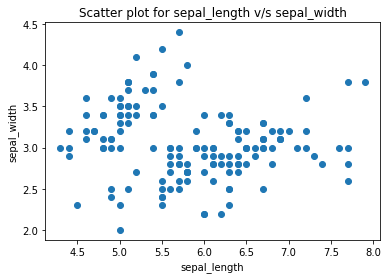

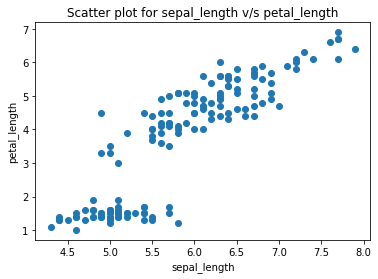

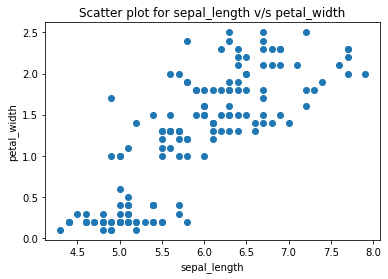

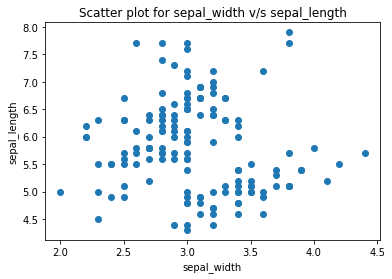

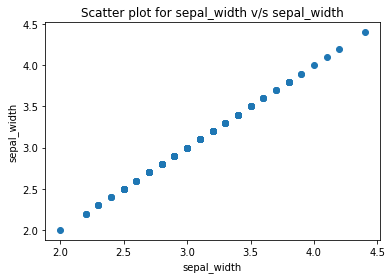

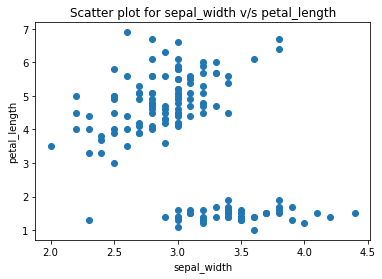

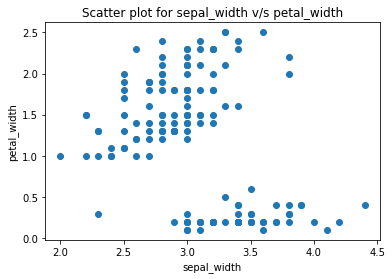

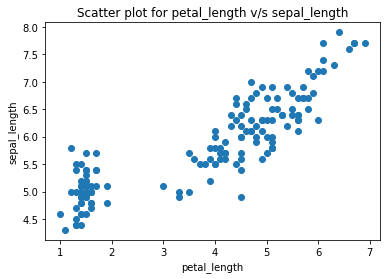

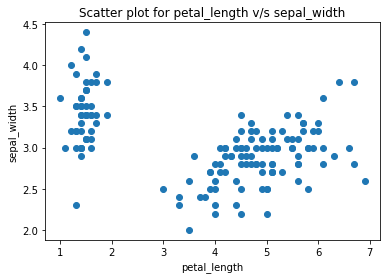

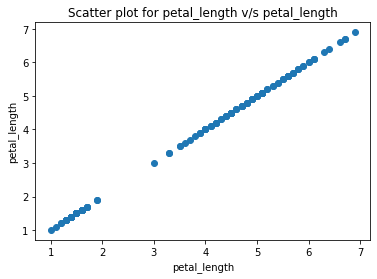

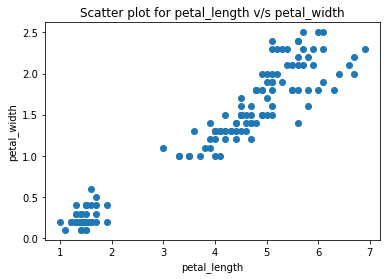

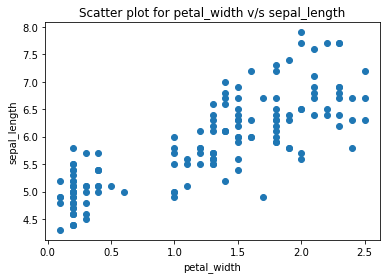

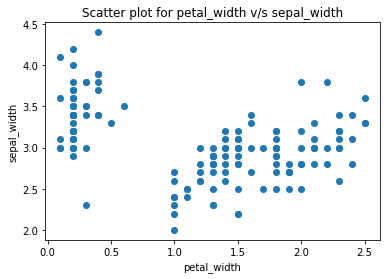

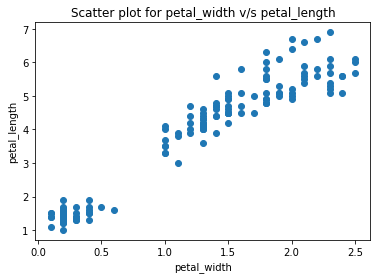

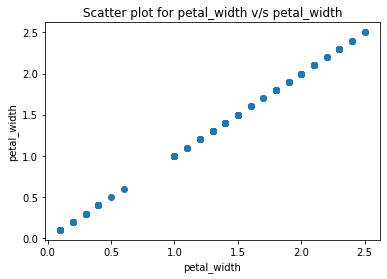

<Figure size 432x288 with 0 Axes>

In [6]:
# plot the graphs to visualize the correlation between two variables and also write a code to visualize the correlation matrix. (6 points).

# Function that  plots the scatter plot between two variables. 
def plot_variables(variable_A,variable_B):
    
    plt.scatter(iris_data[variable_A],iris_data[variable_B])
    plt.title("Scatter plot for " + variable_A + " v/s " + variable_B)
    plt.xlabel(variable_A)
    plt.ylabel(variable_B)
    plt.figure()

# Scatter plot for all the combinations of the feature data    
for i in range(4):
    for j in range(4):
        plot_variables(iris_data.columns[i],iris_data.columns[j])


The correlation matrix is :
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


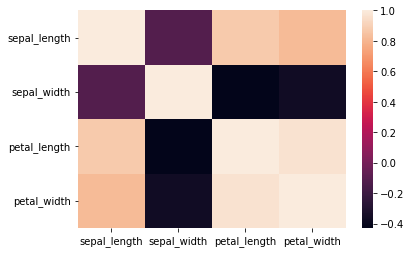

In [14]:
print("The correlation matrix is :\n",iris_data.corr())

# Using seaborn library to plot the heatmap
sns.heatmap(iris_data.corr())
plt.show()

In [9]:
iris_data_features = iris_data.iloc[:,0:4]
iris_data_label = iris_data.iloc[:,4]

#To perform  z-score standardization we will use sklearn library

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standard_data = scaler.fit_transform(iris_data_features)
iris_data_features_standardized = pd.DataFrame(standard_data,columns = iris_data_features.columns)
print("The standardized data is :\n",iris_data_features_standardized)

The standardized data is :
      sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]


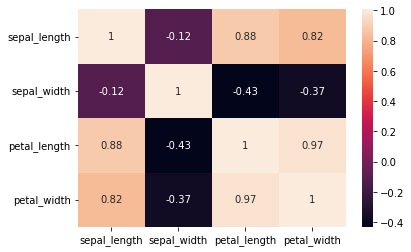

In [10]:
#Compute covariance matrix for the standardized data. (6 points)

cov_matrix = pd.DataFrame.cov(iris_data_features_standardized)
sns.heatmap(cov_matrix, annot=True)
plt.show()

In [13]:
cov_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006711,-0.118359,0.877604,0.823431
sepal_width,-0.118359,1.006711,-0.431316,-0.368583
petal_length,0.877604,-0.431316,1.006711,0.969328
petal_width,0.823431,-0.368583,0.969328,1.006711


In [11]:
# Find the eigenvalues and eigenvectors for the covariance matrix and print them in descending order. (6 points)

eigen_value,eigen_vector = np.linalg.eig(cov_matrix)

print("The eigen values \n",eigen_value)
print("The eigen vectors\n",eigen_vector)


The eigen values 
 [2.93808505 0.9201649  0.14774182 0.02085386]
The eigen vectors
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
